In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
from IPython import display


In [2]:
def compute_heat_states(τ, τ_total):
    return int(np.ceil(τ_total / τ) + 1.0)

def compute_heat_process(T0, λ, τ, h, simulation_time):
    h = np.shape(T0)[0]
    w = np.shape(T0)[1]

    t = τ
    iters = 0
    while t <= simulation_time:
        t += τ
        iters += 1

    T = np.zeros([iters + 1, h, w], dtype=T0.dtype)
    T[0] = T0

    for it in range(1, iters+1):
        for i in range(1, h-1):
            for j in range(1, w-1):
                dT = T[it-1][i+1][j] + T[it-1][i][j +1] + T[it-1][i-1][j] + T[it-1][i][j-1] - 4*T[it-1][i][j]
                T[it][i][j] = (λ * τ) / (h ** 2) * dT + T[it - 1][i][j]

    return T


def compute_heat_process_progonka(To, N, k):
    h = np.shape(To)[0]
    w = np.shape(To)[1]

    T = np.zeros([N, h, w], dtype=To.dtype)
    T[0, 1:-1, 1:-1] = To[1:-1, 1:-1]

    tmp = np.zeros([h, w], dtype=To.dtype)

    k /= 2
    C = -1 - 2 * k

    F1 = np.zeros(w, dtype=To.dtype)
    α1 = np.zeros(w, dtype=To.dtype)
    β1 = np.zeros(w, dtype=To.dtype)

    F2 = np.zeros(h, dtype=To.dtype)
    α2 = np.zeros(h, dtype=To.dtype)
    β2 = np.zeros(h, dtype=To.dtype)

    α1[0] = 0
    β1[0] = 0

    α2[0] = 0
    β2[0] = 0

    for m in (range(1, N)):

        for i in range(1, h - 1):

            for j in range(0, w):
                F1[j] = - k * T[m - 1, i - 1, j] + (2 * k - 1) * T[m - 1, i, j] - k * T[m - 1, i + 1, j]

            for j in range(0, w - 1):
                α1[j + 1] = -k / (k * α1[j] + C)
                β1[j + 1] = (F1[j] - k * β1[j]) / (k * α1[j] + C)

            for j in reversed(range(1, w - 1)):
                tmp[i, j] = α1[j + 1] * tmp[i, j + 1] + β1[j + 1]

        for j in range(1, w - 1):

            for i in range(0, h):
                F2[i] = - k * tmp[i, j - 1] + (2 * k - 1) * tmp[i, j] - k * tmp[i, j + 1]

            for i in range(0, h - 1):
                α2[i + 1] = -k / (k * α2[i] + C)
                β2[i + 1] = (F2[i] - k * β2[i]) / (k * α2[i] + C)

            for i in reversed(range(1, h - 1)):
                T[m, i, j] = α2[i + 1] * tmp[i + 1, j] + β2[i + 1]

    return T

In [14]:
To = np.zeros([11, 11], dtype=np.float32)
To[5][5] = 256.
# To[5][6] = 256.
# To[6][5] = 256.
# To[4][5] = 256.
# To[5][4] = 256.


h = 0.01
simulation_time = 100.0

ρ_fe = 7800 # Kg/m^3
c_fe = 450 # J/(Kg*°K)
λ_fe = 80 # W/(m*°K)

ρ = ρ_fe
c = c_fe
λ = λ_fe

τ = 0.001 # s
τ_total = 60.0 / 10.0 # s


σ = λ / (ρ * c) # m^2/s
k = τ*σ / (h ** 2)

In [11]:
T = (compute_heat_process(To, λ, τ, h, simulation_time))
print("Calc ended!")

KeyboardInterrupt: 

In [12]:
i=0
for img in T:
    i = i + 1
    if i % 50 != 0:
        continue
    
    display.display(plt.gcf())
    display.clear_output(wait=True)
    plt.clf()
    
    plt.imshow(img, aspect='auto', cmap='hot')
    plt.xticks([]),
    plt.yticks([])
    plt.title(i)
    plt.draw()
    #plt.pause(0.0001)   
#     display.display(plt.gcf())
#     display.clear_output(wait=True)
print("anim ended")  

NameError: name 'T' is not defined

In [15]:
N = compute_heat_states(τ, τ_total)
T_new = compute_heat_process_progonka(To, N, k)
print("Calc ended!")

Calc ended!


anim ended


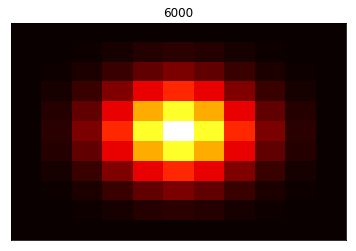

In [16]:
i = 0
for img in T_new:
    i = i + 1
    if i % 15 != 0:
        continue
#     plt.figure(figsize = (10,10))
    #plt.title(frame_id)
    
    display.display(plt.gcf())
    display.clear_output(wait=True)
    plt.clf()
    
    plt.imshow(img, aspect='auto', cmap='hot')
    plt.xticks([]),
    plt.yticks([])
    plt.title(i)
    plt.draw()
    #plt.pause(0.0001)   
#     display.display(plt.gcf())
#     display.clear_output(wait=True)
print("anim ended")  